In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Create Some Data

In [2]:
from sklearn.datasets import make_blobs

In [3]:
data = make_blobs(n_samples=100, n_features=3,centers=2,random_state=101)

In [8]:
data

(array([[  0.99429187,   0.87511711,  -9.99909683],
        [  0.65761885,   0.91624771, -10.18458517],
        [ -6.48804352,   3.29034852,   6.73159871],
        [  0.5815206 ,   2.06249948,  -9.07157495],
        [ -7.42442678,   5.30835517,   6.86341624],
        [  2.26790487,   0.40816482, -10.17230518],
        [  1.62073713,  -0.05416228,  -9.92461083],
        [  2.41199108,   1.03683306,  -9.20017913],
        [ -7.62441747,   5.87096075,   5.41069708],
        [ -7.34160752,   3.671108  ,   7.36634568],
        [ -7.56358517,   3.5736335 ,   5.34284552],
        [  2.22972735,   1.6514787 ,  -7.43386319],
        [ -0.75249891,   2.31574949,  -9.26873428],
        [  0.54946324,   0.5581557 ,  -7.88852506],
        [ -0.4308995 ,   0.48011452,  -8.47545896],
        [ -1.19436032,   2.54705473,  -8.90232874],
        [ -0.06318407,   2.4416449 , -11.40312057],
        [ -6.70999871,   3.8246846 ,   7.34365184],
        [  1.32054601,   2.60559237, -10.47729501],
        [  0

## Scale the Data

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[0])

In [11]:
# data[0] 
data_x = scaled_data[:,0]
data_y = scaled_data[:,1]
data_z = scaled_data[:,2]

In [12]:
from mpl_toolkits.mplot3d import Axes3D

In [17]:
data_x

array([0.87649968, 0.84785217, 0.23982771, 0.84137697, 0.16015085,
       0.98487142, 0.92980391, 0.99713171, 0.14313364, 0.16719794,
       0.14830987, 0.98162289, 0.72786524, 0.83864921, 0.75523013,
       0.69026725, 0.78651904, 0.22094154, 0.90426064, 0.80499209,
       0.81983375, 0.19495157, 0.80597248, 0.85303258, 0.14036096,
       0.18601685, 0.95652347, 0.24544051, 0.16307767, 0.19300441,
       0.44510453, 0.73952811, 0.87136416, 0.38196981, 0.84049455,
       0.70666178, 0.93955298, 0.0529159 , 0.87520619, 0.29857782,
       1.        , 0.94594811, 0.2602609 , 0.09394537, 0.87776667,
       0.21422974, 0.83603725, 0.07638817, 0.75417021, 0.34535566,
       0.26992656, 0.6746317 , 0.81711549, 0.26637047, 0.74603931,
       0.32904413, 0.86479931, 0.73617815, 0.27661292, 0.72332605,
       0.76787563, 0.30971235, 0.90700368, 0.24085769, 0.20749699,
       0.22529248, 0.1835061 , 0.8818352 , 0.83572499, 0.32069662,
       0.30699637, 0.89068503, 0.83231307, 0.        , 0.88645

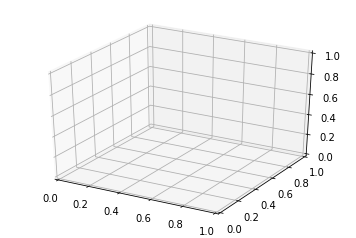

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

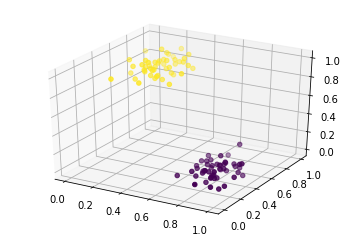

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(data_x,data_y,data_z,c=data[1])

# The Linear Autoencoder

In [19]:
import tensorflow as tf
from tensorflow.contrib.layers import fully_connected

/Users/alanteo/anaconda2/envs/tfdeeplearning/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [20]:
num_inputs = 3  # 3 dimensional input
num_hidden = 2  # 2 dimensional representation 
num_outputs = num_inputs # Must be true for an autoencoder!

learning_rate = 0.01

### Placeholder

Notice there is no real label here, just X.

In [21]:
X = tf.placeholder(tf.float32, shape=[None, num_inputs])

### Layers

Using the fully_connected layers API, we **do not** provide an activation function!

In [22]:
hidden = fully_connected(X, num_hidden, activation_fn=None)
outputs = fully_connected(hidden, num_outputs, activation_fn=None)

### Loss Function

In [23]:
loss = tf.reduce_mean(tf.square(outputs - X))  # MSE

### Optimizer

In [24]:
optimizer = tf.train.AdamOptimizer(learning_rate)
train  = optimizer.minimize( loss)

### Init

In [25]:
init = tf.global_variables_initializer()

## Running the Session

In [26]:
num_steps = 1000

with tf.Session() as sess:
    sess.run(init)
    
    for iteration in range(num_steps):
        sess.run(train,feed_dict={X: scaled_data})

        
    # Now ask for the hidden layer output (the 2 dimensional output)
    output_2d = hidden.eval(feed_dict={X: scaled_data})

In [27]:
output_2d.shape

(100, 2)

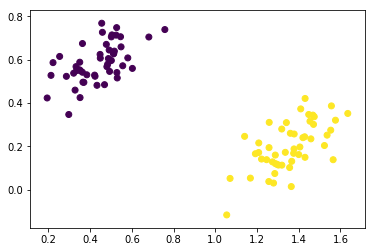

In [28]:
plt.scatter(output_2d[:,0],output_2d[:,1],c=data[1])